In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 946.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 3.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tableone

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 659.9 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 5.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.0 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 20.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install forestplot

  Attempting uninstall: matplotlib-inline
    Found existing installation: matplotlib-inline 0.1.7
    Uninstalling matplotlib-inline-0.1.7:
      Successfully uninstalled matplotlib-inline-0.1.7
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 830.1 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas
from datetime import datetime
import numpy as np
from tableone import TableOne, load_dataset
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import forestplot as fp



In [6]:
dataset_12345678_person_df = pandas.read_csv("SCDCase.csv")
dataset_23456789_person_df = pandas.read_csv("SCDControl.csv")
dataset_34567890_person_df = pandas.read_csv("StrokeCase.csv")

# The condition we are looking at 
condition_1_name = "Stroke"
condition_2_name = "TCD"


In [7]:
# Rename data frames
case_df = dataset_12345678_person_df
control_df = dataset_23456789_person_df
stroke_df= dataset_34567890_person_df

In [8]:
# Displaying the head and shape of the dataframe
print(case_df.shape)
case_df.head()

(1500, 5)


,person_id,sex_at_birth,date_of_birth,race,ethnicity
0,1,Female,1997-04-01 12:53:56 UTC,Black or African American,Not Hispanic or Latino
1,2,Female,1949-04-10 03:34:59 UTC,Black or African American,Not Hispanic or Latino
2,3,Female,1998-11-25 18:52:47 UTC,Black or African American,Hispanic or Latino
3,4,Male,1968-04-12 03:42:21 UTC,Black or African American,Not Hispanic or Latino
4,5,Female,1955-09-13 07:59:13 UTC,Black or African American,Hispanic or Latino


In [9]:
# Assign all cases with the value 1 in a new column called 'outcome'
case_df['outcome'] = 1

# Assign all controls with the value 0 to same column
control_df['outcome'] = 0

In [10]:
#create column with labels -- this is for tables/plots only
case_df['outcome_f'] = condition_1_name
control_df['outcome_f'] = f'No {condition_1_name}'

In [11]:
# Displaying the head and shape of the dataframe
print(case_df.shape)
case_df.head()

(1500, 7)


,person_id,sex_at_birth,date_of_birth,race,ethnicity,outcome,outcome_f
0,1,Female,1997-04-01 12:53:56 UTC,Black or African American,Not Hispanic or Latino,1,Stroke
1,2,Female,1949-04-10 03:34:59 UTC,Black or African American,Not Hispanic or Latino,1,Stroke
2,3,Female,1998-11-25 18:52:47 UTC,Black or African American,Hispanic or Latino,1,Stroke
3,4,Male,1968-04-12 03:42:21 UTC,Black or African American,Not Hispanic or Latino,1,Stroke
4,5,Female,1955-09-13 07:59:13 UTC,Black or African American,Hispanic or Latino,1,Stroke


In [12]:
# Assign 1 to all persons in a new column called 'predictor'
stroke_df['predictor'] = "TCD"

print(stroke_df.shape)
stroke_df.head()

(3504, 2)


,person_id,predictor
0,1337,TCD
1,598,TCD
2,721,TCD
3,851,TCD
4,1393,TCD


In [13]:
# Full join the case and control dfs
merged_df = pandas.merge(case_df, control_df, how='outer') 

# Left join the condition_df
merged_df = pandas.merge(merged_df, stroke_df, how='left', on='person_id')

In [14]:
merged_df.head()

,person_id,sex_at_birth,date_of_birth,race,ethnicity,outcome,outcome_f,predictor
0,1,Female,1997-04-01 12:53:56 UTC,Black or African American,Not Hispanic or Latino,1,Stroke,TCD
1,2,Female,1949-04-10 03:34:59 UTC,Black or African American,Not Hispanic or Latino,1,Stroke,TCD
2,3,Female,1998-11-25 18:52:47 UTC,Black or African American,Hispanic or Latino,1,Stroke,TCD
3,4,Male,1968-04-12 03:42:21 UTC,Black or African American,Not Hispanic or Latino,1,Stroke,NaN
4,5,Female,1955-09-13 07:59:13 UTC,Black or African American,Hispanic or Latino,1,Stroke,NaN


In [15]:
# This takes the NA values created from the left join and makes them the value 'No condition_2_name' or NO TCD.
merged_df = merged_df.fillna(f'No {condition_2_name}')

In [16]:
merged_df.head()

,person_id,sex_at_birth,date_of_birth,race,ethnicity,outcome,outcome_f,predictor
0,1,Female,1997-04-01 12:53:56 UTC,Black or African American,Not Hispanic or Latino,1,Stroke,TCD
1,2,Female,1949-04-10 03:34:59 UTC,Black or African American,Not Hispanic or Latino,1,Stroke,TCD
2,3,Female,1998-11-25 18:52:47 UTC,Black or African American,Hispanic or Latino,1,Stroke,TCD
3,4,Male,1968-04-12 03:42:21 UTC,Black or African American,Not Hispanic or Latino,1,Stroke,No TCD
4,5,Female,1955-09-13 07:59:13 UTC,Black or African American,Hispanic or Latino,1,Stroke,No TCD


In [17]:
# Categorize the variables
merged_df['race'] = merged_df['race'].astype('category')
merged_df['ethnicity'] = merged_df['ethnicity'].astype('category')
merged_df['sex_at_birth'] = merged_df['sex_at_birth'].astype('category')
merged_df['predictor'] = merged_df['predictor'].astype('category')
merged_df['outcome_f'] = merged_df['outcome_f'].astype('category')

In [18]:
# Check levels..change variable name 'predictor' to relevel other demographics
print(merged_df['predictor'].cat.categories)

Index(['No TCD', 'TCD'], dtype='object')


In [19]:
# Reset the predictor reference level to 'No {condition_2_name}'
merged_df['predictor'] = merged_df['predictor'].cat.reorder_categories([f"No {condition_2_name}", condition_2_name])
print(merged_df['predictor'].cat.categories)

Index(['No TCD', 'TCD'], dtype='object')


In [20]:
#Lets calculate age. The workbench does have a code snippet for this but we will do this by hand for now

# Get today's date

today = datetime.now()

In [21]:
# Ensure the date_of_birth is in datetime format
merged_df['date_of_birth'] = pandas.to_datetime(merged_df['date_of_birth']).dt.date

# Calculate age in years
merged_df['age'] = (today - pandas.to_datetime(merged_df['date_of_birth'])) / np.timedelta64(1, 'D') / 365.25
merged_df['age'] = merged_df['age'].astype(int)

# Create age groups
bins = [18, 29, 39, 49, 59, 69, 79, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
merged_df['age_group'] = pandas.cut(merged_df['age'], bins=bins, labels=labels)

# Remove unused categories
merged_df['age_group'] = merged_df['age_group'].cat.remove_unused_categories()

In [22]:
merged_df.head()

,person_id,sex_at_birth,date_of_birth,race,ethnicity,outcome,outcome_f,predictor,age,age_group
0,1,Female,1997-04-01,Black or African American,Not Hispanic or Latino,1,Stroke,TCD,27,18-29
1,2,Female,1949-04-10,Black or African American,Not Hispanic or Latino,1,Stroke,TCD,75,70-79
2,3,Female,1998-11-25,Black or African American,Hispanic or Latino,1,Stroke,TCD,25,18-29
3,4,Male,1968-04-12,Black or African American,Not Hispanic or Latino,1,Stroke,No TCD,56,50-59
4,5,Female,1955-09-13,Black or African American,Hispanic or Latino,1,Stroke,No TCD,68,60-69


In [23]:
# Some deprecation errors..ignore them
warnings.filterwarnings("ignore")

# Define labels for the columns
labels = {
    'sex_at_birth': 'Sex',
    'race': 'Race',
    'ethnicity': 'Ethnicity',
    'age': 'Age',
    'age_group': 'Age Group',
    'predictor': 'Predictor',
    'outcome_f': 'Outcome'
}

# Specify columns to be included in the table
columns = ['age', 'sex_at_birth', 'race', 'ethnicity', 'age_group', 'predictor']

# Specify categorical columns
categorical = ['sex_at_birth', 'race', 'ethnicity', 'age_group', 'predictor']

# Label reference categories
def append_ref_to_label(data, exclude_var=None):
    for column in data.columns:
        if pandas.api.types.is_categorical_dtype(data[column]) and column != exclude_var:
            categories = data[column].cat.categories
            new_categories = [f"{cat} (ref)" if i == 0 else cat for i, cat in enumerate(categories)]
            data[column] = data[column].cat.rename_categories(new_categories)
    return data

labelled_df = merged_df.copy()

append_ref_to_label(labelled_df, exclude_var=None)


# Create an instance of TableOne with the data
table = TableOne(labelled_df, columns=columns, categorical=categorical, groupby='outcome_f', 
                 rename=labels, pval=True, missing=False, overall=False)

# Print the table
table

Grouped by Outcome                      
                                                    No Stroke (ref)        Stroke P-Value
n                                                              8000          1500        
Age, mean (SD)                                          45.9 (15.9)   51.7 (15.9)  <0.001
Sex, n (%)       Female (ref)                           4808 (60.1)    910 (60.7)   0.702
                 Male                                   3192 (39.9)    590 (39.3)        
Race, n (%)      Black or African American (ref)       8000 (100.0)  1500 (100.0)   1.000
Ethnicity, n (%) Hispanic or Latino (ref)               1399 (17.5)    258 (17.2)   0.816
                 Not Hispanic or Latino                 6601 (82.5)   1242 (82.8)        
Age Group, n (%) 18-29 (ref)                            1595 (19.9)    196 (13.1)  <0.001
                 30-39                                  1504 (18.8)    188 (12.5)        
                 40-49                                  1512 (18.9)    198 (13.2)        
                 50-59                                  1472 (18.4)    333 (22.2)        
                 60-69                                  1244 (15.6)    394 (26.3)        
                 70-79                                    673 (8.4)    191 (12.7)        
Predictor, n (%) No TCD (ref)                           5339 (66.7)    657 (43.8)  <0.001
                 TCD                                    2661 (33.3)    843 (56.2)

Levene's test for age.

Age is a quantitative variable we will use to compare the spread (or variance) of age between the case and control groups.

In [28]:
# Split dfs into case and control groups
case_group = merged_df[merged_df['outcome'] == 0]
control_group = merged_df[merged_df['outcome'] == 1]

# Run Levene's test on age 
stats.levene(case_group['age'], control_group['age'], center='mean')

LeveneResult(statistic=np.float64(0.17961087106043203), pvalue=np.float64(0.6717174624445481))

Interpreting Levene's Test Output:

statistic: A value representing the significance of the difference in variability among groups. Lower values suggest that variances are more similar.

p-value: A value greater than common significance levels (e.g., 0.05), suggesting insufficient evidence to reject the null hypothesis of equal variances.

Histogram Plot

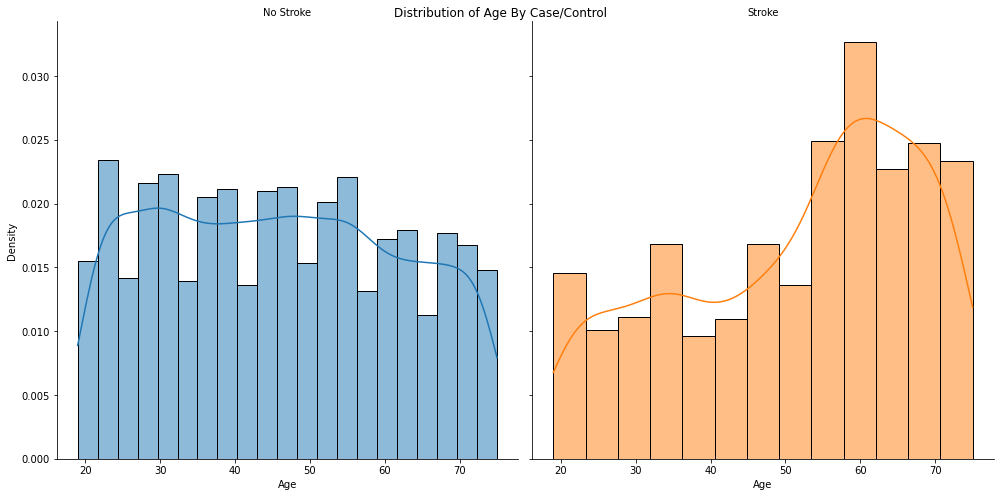

In [33]:
# Separate plot by outcome groups
# Set height of plot
hist_grid = sns.FacetGrid(merged_df, col="outcome_f", height = 7)
# Create histogram..specify density as stat
hist_grid.map_dataframe(sns.histplot, x='age', stat="density", kde=True, hue='outcome_f')
# Set grouping label
hist_grid.set_titles("{col_name}")
# Set title
hist_grid.fig.suptitle("Distribution of Age By Case/Control")
# Set axis labels
hist_grid.set_axis_labels('Age', 'Density')

Bar Plot

categorical values in the case and control groups


In [34]:
# Specify the column name for the categorical variable
categorical_variable = "race"
label = "Race"
fig_height = 7

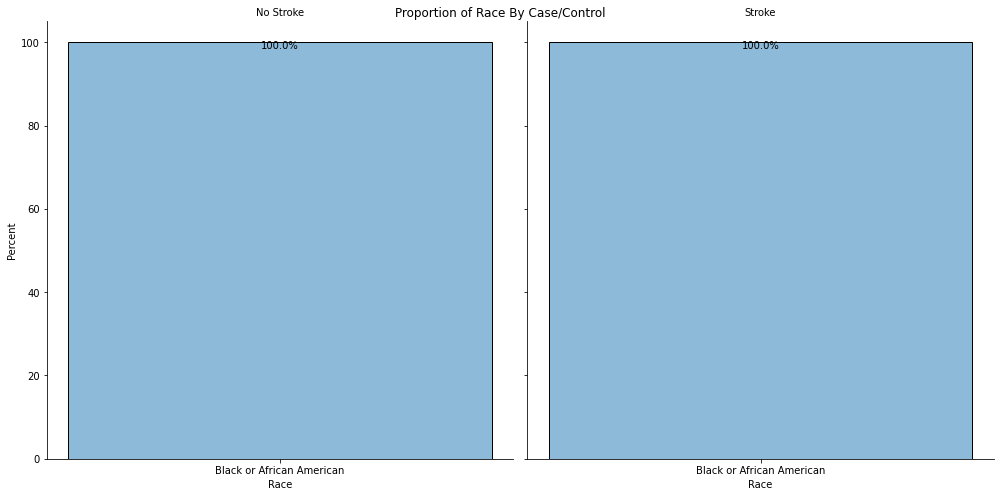

In [35]:
# Separate by outcome
perc_grid = sns.FacetGrid(merged_df, col="outcome_f", height = fig_height)
# Create histogram..specify percentage as stat
perc_grid.map_dataframe(sns.histplot, x=categorical_variable, stat="percent", hue=categorical_variable)
# Set grouping label
perc_grid.set_titles("{col_name}")
# Set title
perc_grid.fig.suptitle(f"Proportion of {label} By Case/Control")
# Set axis labels
perc_grid.set_axis_labels(label, 'Percent')

def annotate(ax):
    for p in ax.patches:
        if p.get_height() > 0:  # Add annotations only for bars with non-zero height
            percentage = '{:.1f}%'.format(p.get_height())
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() - 2
            ax.text(x, y, percentage, ha='center', va='bottom')

# Applying the annotation function to each axis
for ax in perc_grid.axes.flat:
    annotate(ax)

plt.show()

Logistic Regression

A foundational approach to understand the relationship between a binary response variable and a single predictor.

Key components :

Response Variable: At its core, this method requires a binary outcome. Think of results like Yes/No, 1/0, or Success/Failure.

Predictor Variable: This can be either categorical, such as gender, or continuous like age. 

Odds Ratio (OR):  For a categorical predictor, the odds ratio compares the odds of the outcome between different levels of the predictor relative to a reference category, rather than indicating the change in odds for a one-unit increase.

In [36]:
# Run logistic regression
unadj_reg = smf.logit("outcome ~ predictor", data = merged_df).fit()
# Show results
unadj_reg.summary()

Optimization terminated successfully.
         Current function value: 0.421651
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 9500
Model:                          Logit   Df Residuals:                     9498
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                 0.03327
Time:                        15:30:10   Log-Likelihood:                -4005.7
converged:                       True   LL-Null:                       -4143.5
Covariance Type:            nonrobust   LLR p-value:                 6.420e-62
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -2.0951      0.041    -50.674      0.000      -2.176      -2.014
predictor[T.TCD]     0.9456      0.057     16.533      0.000       0.834       1.058
====================================================================================
"""

Interpreting the Logistic Regression Output:

Pseudo R-squared: A measure to compare the fit of the model to a null model. It doesn’t have a straightforward interpretation as the proportion of variance explained, but rather it gives us an idea of the improvement of our model over a null model.

Log-Likelihood: Representing the log of the likelihood function at its maximum. These will always be negative, and a higher (closer to 0) value indicates a better model fit.

LLR p-value: A low p-value suggests that the model is a better fit than a null model with no predictors.

coef:
Intercept: The log-odds of the outcome when all predictors are zero.

predictor (TCD): The change in log-odds of the outcome for a unit change in the predictor.

std err: The standard error of the coefficients. It is a measure of the accuracy of the coefficients.

z: The z-score, calculated as the coefficient divided by the standard error. It is used to test the hypothesis that the coefficient is different from zero.

P>|z|: The p-value associated with the z-score;It helps you infer the statistical significance of each coefficient.

[0.025 0.975]: The 95% confidence interval for the coefficient.

Odds ratio and confidence interval 

In [37]:
# Create OR column
unadj_odds = pandas.DataFrame(np.exp(unadj_reg.params), columns= ['OR'])
# Create CI column
unadj_odds[['2.5%', '97.5%']] = np.exp(unadj_reg.conf_int())
# Print OR and CI
unadj_odds


,OR,2.5%,97.5%
Intercept,0.123057,0.113478,0.133444
predictor[T.TCD],2.574407,2.301398,2.879803


Let's incorporate multiple predictors.

In [38]:
# Run logistic regression
adj_reg = smf.logit("outcome ~ predictor + ethnicity + age_group + sex_at_birth + race", data = merged_df).fit()
# Show results
adj_reg.summary()

Optimization terminated successfully.
         Current function value: 0.412031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 9500
Model:                          Logit   Df Residuals:                     9491
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Jul 2024   Pseudo R-squ.:                 0.05533
Time:                        15:35:37   Log-Likelihood:                -3914.3
converged:                       True   LL-Null:                       -4143.5
Covariance Type:            nonrobust   LLR p-value:                 5.592e-94
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.5215      0.106    -23.762      0.000      -2.729      -2.314
predictor[T.TCD]                        0.9298      0.058     16.076      0.000       0.816       1.043
ethnicity[T.Not Hispanic or Latino]     0.0222      0.077      0.290      0.772      -0.128       0.172
age_group[T.30-39]                      0.0490      0.109      0.447      0.655      -0.166       0.264
age_group[T.40-49]                      0.0786      0.108      0.726      0.468      -0.133       0.291
age_group[T.50-59]                      0.5892      0.098      5.994      0.000       0.397       0.782
age_group[T.60-69]                      0.9448      0.097      9.778      0.000       0.755       1.134
age_group[T.70-79]                      0.8375      0.113      7.387      0.000       0.615       1.060
sex_at_birth[T.Male]                   -0.0258      0.059     -0.436      0.663      -0.142       0.090
=======================================================================================================
"""

Likelihood Ratio Test

A likelihood ratio test is used to compare the fit of your full model (including the variable of interest) against a reduced model (excluding the variable of interest) to see if there's a significant reduction in fit without that variable.

In [40]:
no_age = smf.logit("outcome ~ predictor + ethnicity + sex_at_birth + race", data = merged_df).fit()
no_race = smf.logit("outcome ~ predictor + ethnicity + age + sex_at_birth", data = merged_df).fit()

# Assuming adj_reg, no_age, and no_race are your model results
# Calculate the log-likelihood for each model
ll_full = adj_reg.llf  # Log-likelihood of the full model
ll_no_age = no_age.llf  # Log-likelihood of the model without age
ll_no_race = no_race.llf  # Log-likelihood of the model without race

# Calculate the test statistic
lr_stat_no_age = -2 * (ll_no_age - ll_full)
lr_stat_no_race = -2 * (ll_no_race - ll_full)

# Calculate degrees of freedom difference
df_diff_no_age = adj_reg.df_model - no_age.df_model
df_diff_no_race = adj_reg.df_model - no_race.df_model

# Calculate the p-value
p_value_no_age = stats.chi2.sf(lr_stat_no_age, df_diff_no_age)
p_value_no_race = stats.chi2.sf(lr_stat_no_race, df_diff_no_race)

print(f"LR Test Statistic (No Age): {lr_stat_no_age}, p-value: {p_value_no_age}")
print(f"LR Test Statistic (No Race): {lr_stat_no_race}, p-value: {p_value_no_race}")

Optimization terminated successfully.
         Current function value: 0.421636
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.413265
         Iterations 6
LR Test Statistic (No Age): 182.5009592269762, p-value: 1.5640695140323397e-37
LR Test Statistic (No Race): 23.446126009861473, p-value: 0.00010311696064474594


Interpreting the Likelihood Ratio Test Results:

Current Function Value: Represents the value of the log-likelihood function per observation at its optimum. Lower values indicate a better fit of the model to the data.

Iterations: The number of iterations taken to reach the optimization of the model. A lower number of iterations suggests that the model converged more quickly to the best fit.

LR Test Statistic: This statistic measures the difference in fit between the full model and a reduced model excluding the age and race variables. A large value indicates a significant change in model fit due to the exclusion of age or race.

Odds Ration and Confidence Intervals for Multivariable/Adjusted Logisic Regression

In [41]:
# Create OR column
adj_odds = pandas.DataFrame(np.exp(adj_reg.params), columns= ['OR'])
# Create CI column
adj_odds[['2.5%', '97.5%']] = np.exp(adj_reg.conf_int())
# Print OR and CI
adj_odds

,OR,2.5%,97.5%
Intercept,0.080340,0.065254,0.098914
predictor[T.TCD],2.534062,2.262479,2.838244
ethnicity[T.Not Hispanic or Latino],1.022459,0.880056,1.187906
age_group[T.30-39],1.050191,0.847372,1.301553
age_group[T.40-49],1.081748,0.875074,1.337233
age_group[T.50-59],1.802588,1.486680,2.185625
age_group[T.60-69],2.572389,2.128571,3.108745
age_group[T.70-79],2.310596,1.850217,2.885529
sex_at_birth[T.Male],0.974565,0.867940,1.094288


Summary of all Logistic Regressions

In [42]:
# Create table with unadjusted and adjusted OR (CI)
final_table = pandas.DataFrame({
    'Predictor': condition_2_name,
    'Univariate OR (95% CI)': [f"{unadj_odds['OR'][1]:.2f} ({unadj_odds['2.5%'][1]:.2f} - {unadj_odds['97.5%'][1]:.2f})"],
    'Multivariate OR (95% CI)': [f"{adj_odds['OR'][1]:.2f} ({adj_odds['2.5%'][1]:.2f} - {adj_odds['97.5%'][1]:.2f})"],
    })

# Print table without index 
final_table.index=[''] * len(final_table)
final_table

,Predictor,Univariate OR (95% CI),Multivariate OR (95% CI)
,TCD,2.57 (2.30 - 2.88),2.53 (2.26 - 2.84)


This forest plot displays the adjusted ORs for all categorical variables in the analysis.


In [43]:
forest_table = adj_odds[1:][:]
forest_table['label'] = [v.split('.')[1].split(']')[0] for v in list(forest_table.index)]

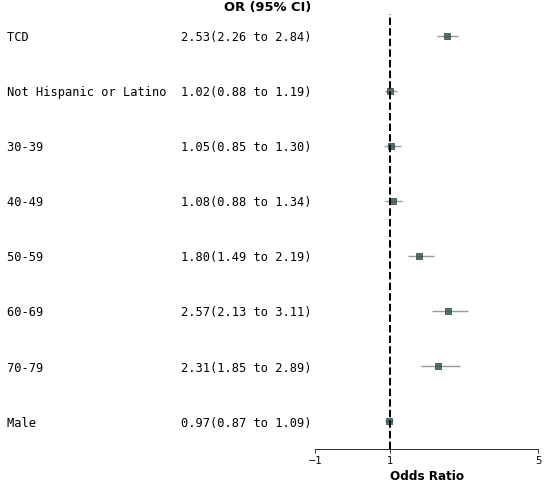

In [44]:
# Create the forest plot
ax = fp.forestplot(forest_table,  # the dataframe with results data
                   estimate="OR",  # column containing estimated effect size
                   ll="2.5%", hl="97.5%",  # columns containing confidence interval lower and higher limits
                   varlabel="label",
                   ylabel="OR (95% CI)",
                   xlabel="Odds Ratio",
                   xticks=[-1, 1, 5])

# Add a vertical line at x=1
ax.axvline(x=1, color='black', linestyle='--', linewidth=2)  # Customize color, linestyle, and linewidth as needed

# Optionally, if you want to try to remove or hide the automatic line at x=0, you can do the following:
ax.axvline(x=0, color='white', linewidth=2)  # Attempt to cover it with a line the color of the background

# Show the plot
plt.show()